In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [3]:
df=pd.read_csv('/content/drive/MyDrive/today/Data_Train.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Missing Value

In [6]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


# Drop Null

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# Dublicate Value

In [9]:
df.duplicated().sum()

220

# Drop Dupplicate

In [10]:
df.drop_duplicates(inplace=True,keep='first')

In [11]:
df.duplicated().sum()

0

# EDA

In [12]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [13]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
df['Airline'].nunique()

12

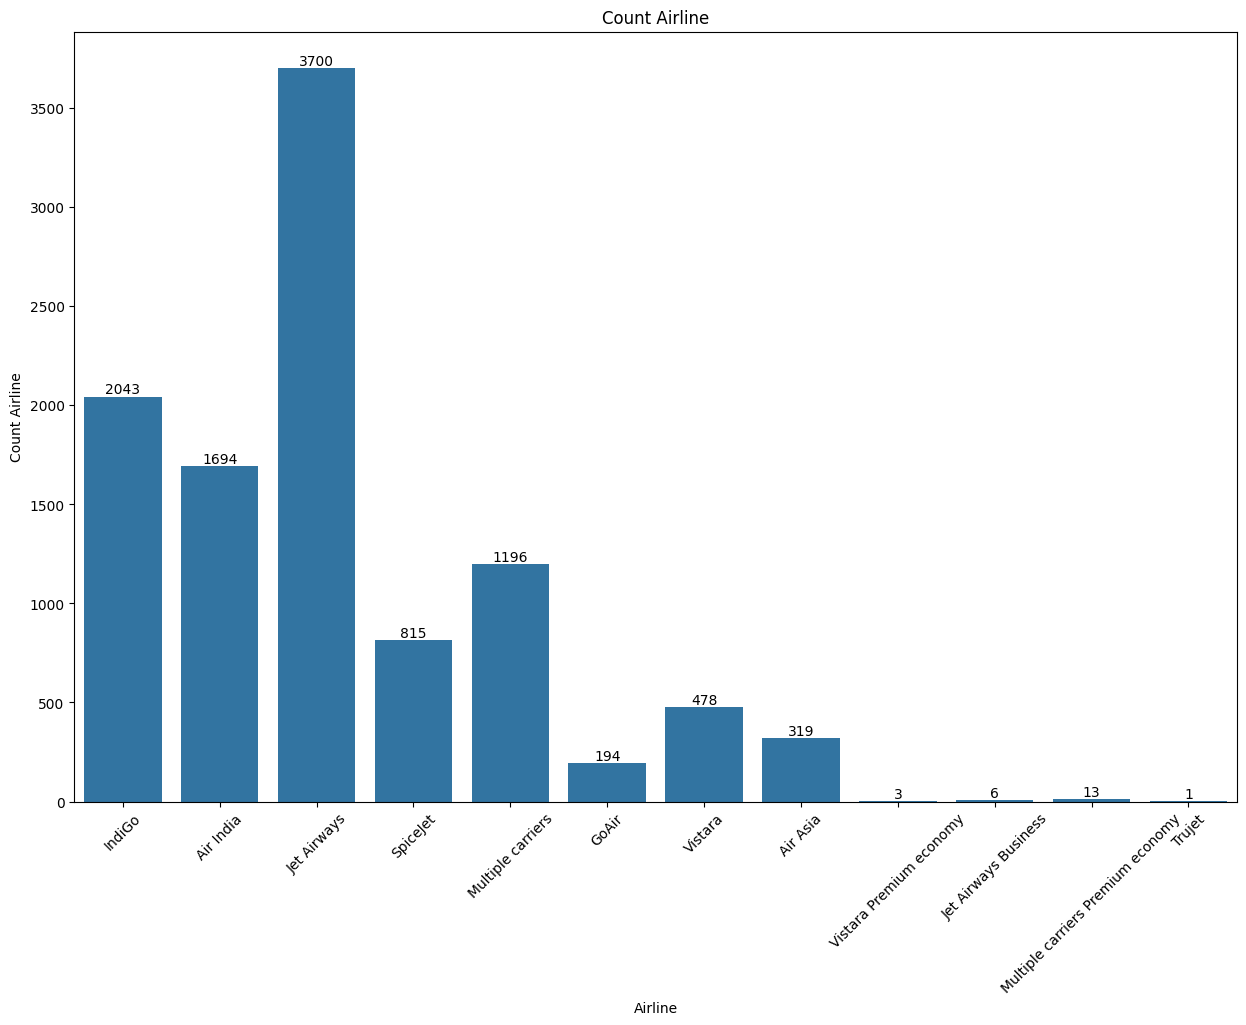

In [15]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Airline',data=df)
plt.xlabel('Airline')
plt.ylabel('Count Airline')
plt.title('Count Airline')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

In [16]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8182
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


# replace No Info with No info

In [17]:
df['Additional_Info']=df['Additional_Info'].str.replace('Info','info')

In [18]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8185
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
1 Short layover,1
Red-eye flight,1
2 Long layover,1


In [19]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4345
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


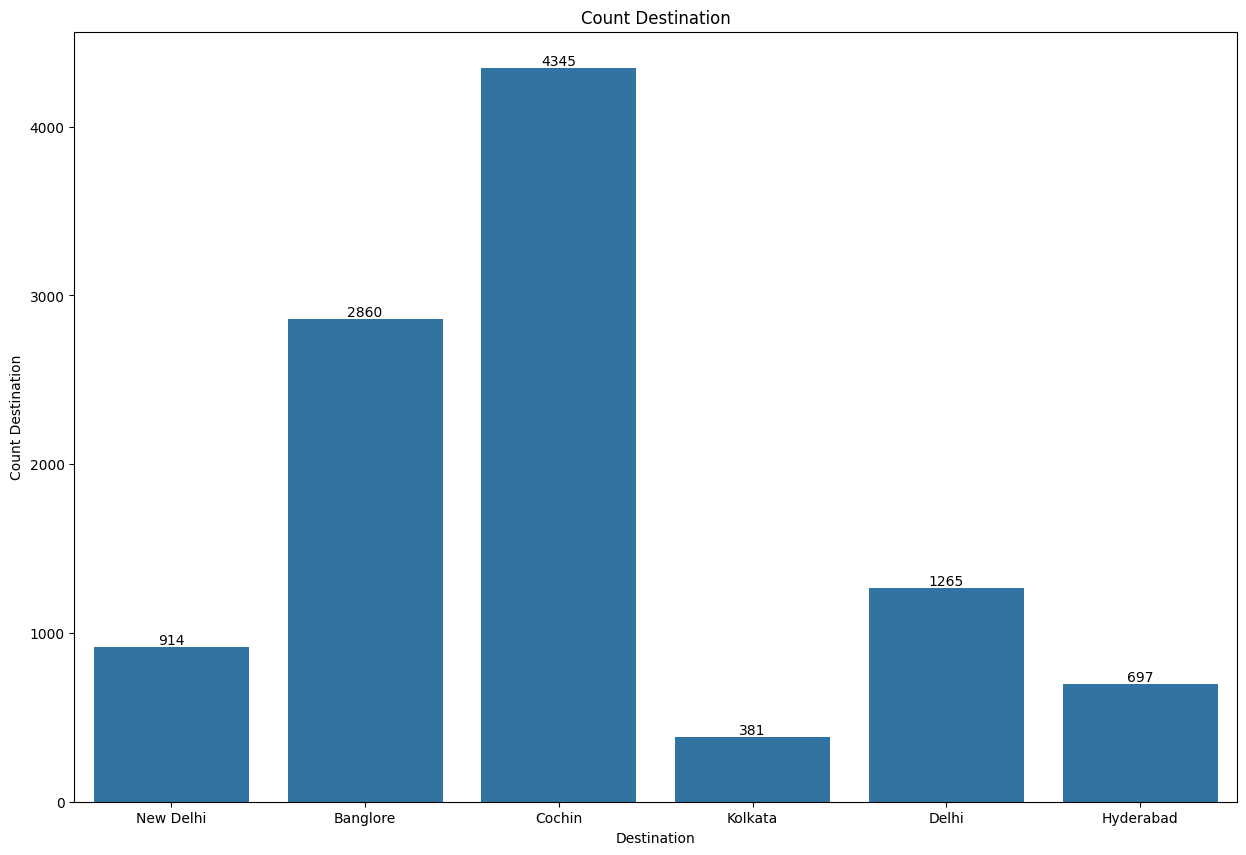

In [20]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Destination',data=df)
plt.xlabel('Destination')
plt.ylabel('Count Destination')
ax.bar_label(ax.containers[0])
plt.title('Count Destination')
plt.show()

In [21]:
df['Source'].value_counts()

,count
Source,
Delhi,4345
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


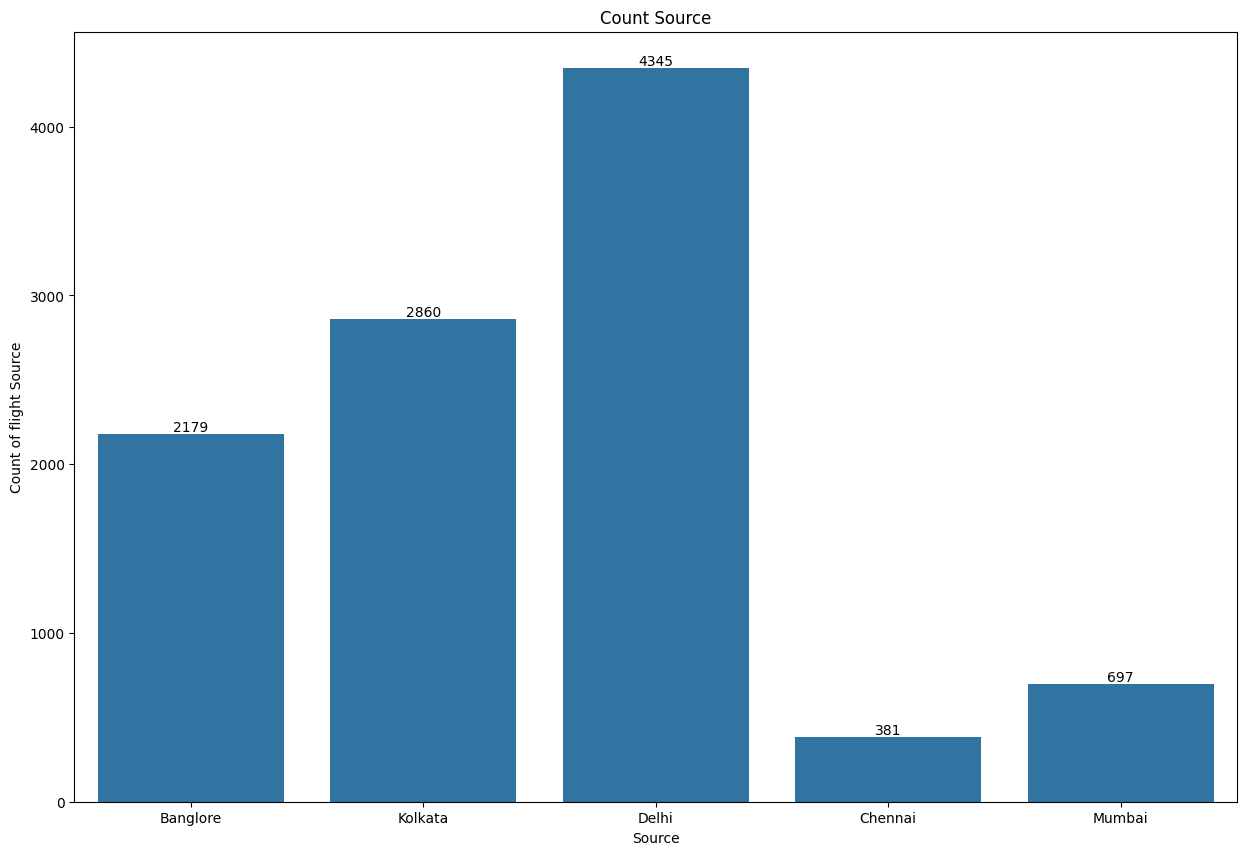

In [22]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Source',data=df)
plt.xlabel('Source')
plt.ylabel('Count of flight Source')
ax.bar_label(ax.containers[0])
plt.title('Count Source')
plt.show()

#delete stop word and keep number of stops only

In [23]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-stop','0').str[0]

In [24]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1,5625
0,3475
2,1318
3,43
4,1


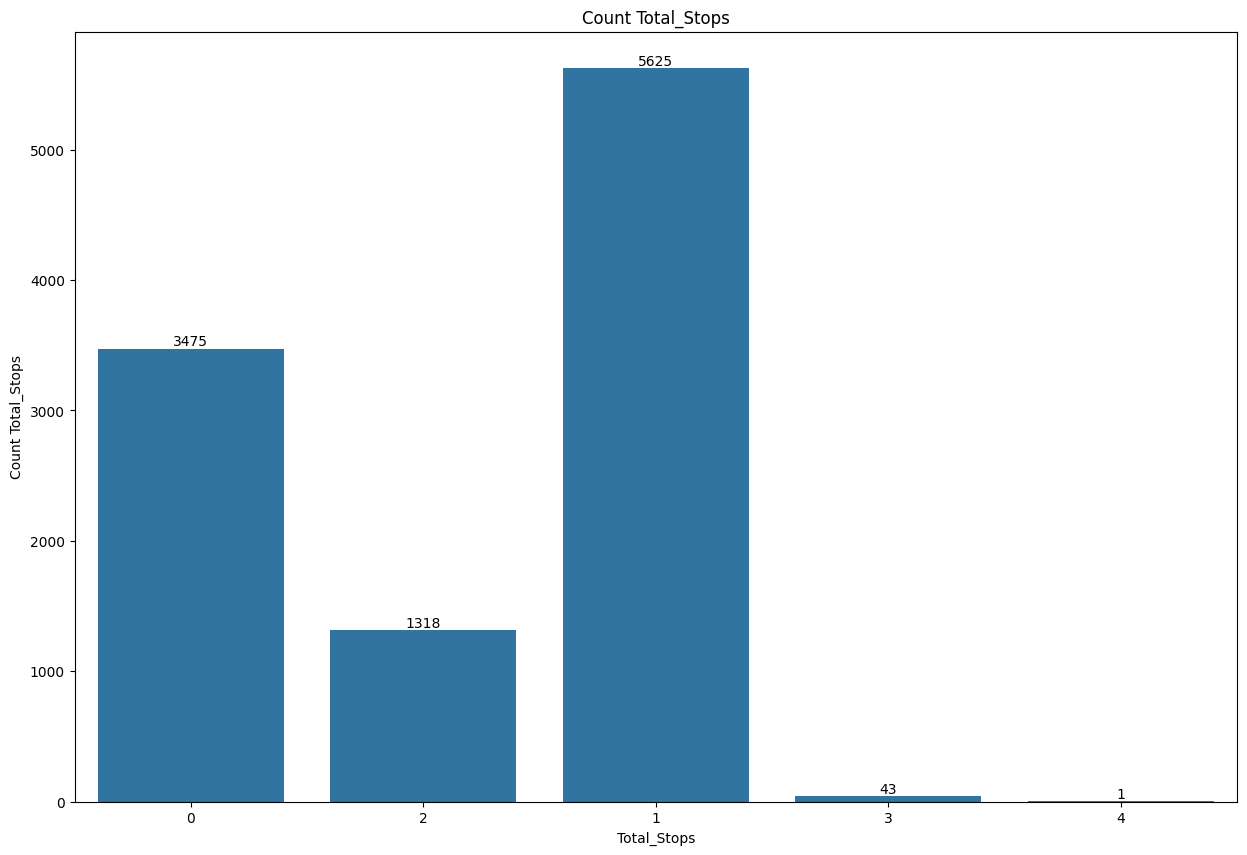

In [25]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='Total_Stops',data=df)
plt.xlabel('Total_Stops')
plt.ylabel('Count Total_Stops')
ax.bar_label(ax.containers[0])
plt.title('Count Total_Stops')
plt.show()

In [26]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','')

In [27]:
df['Duration'].value_counts()

,count
Duration,
2*60+50,544
1*60+30,386
2*60+45,335
2*60+55,332
2*60+35,329
...,...
30*60+25,1
30*60+15,1
42*60+5,1


# Convert to data time

In [28]:
df['Duration']=df['Duration'].apply(eval).astype(int)

In [29]:
df['Duration'].value_counts()

,count
Duration,
170,544
90,386
165,335
175,332
155,329
...,...
1825,1
1815,1
2525,1


In [30]:
df['Duration'].head()

,Duration
0,170
1,445
2,1140
3,325
4,285


# Date Journey

In [31]:
df['Date_of_Journey'].value_counts()

,count
Date_of_Journey,
6/06/2019,490
18/05/2019,486
9/06/2019,485
12/06/2019,483
21/05/2019,482
9/05/2019,466
21/03/2019,412
15/05/2019,402
27/05/2019,369


In [32]:
df[['Day','Month','Year']]=df['Date_of_Journey'].str.split('/',expand=True)

In [33]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,01,03,2019


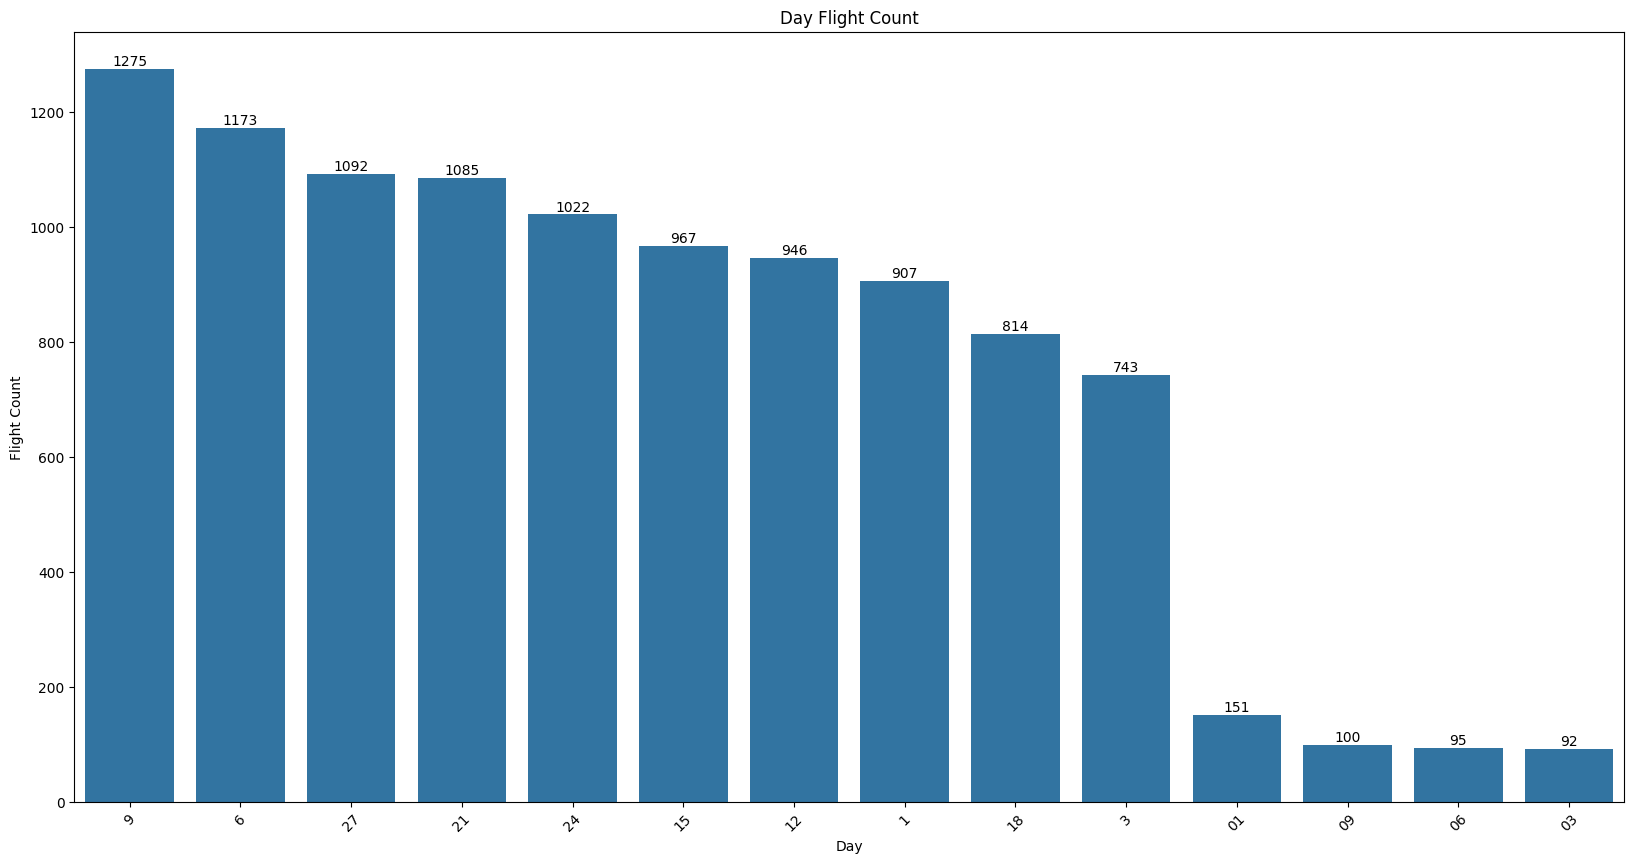

In [34]:
plt.figure(figsize=(20, 10))
sorted_df = df['Day'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Day', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Flight Count')
plt.title('Day Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
ax.bar_label(ax.containers[0])
# Display the plot
plt.show()

In [35]:
df['Month'].value_counts()

,count
Month,
05,3395
06,3311
03,2678
04,1078


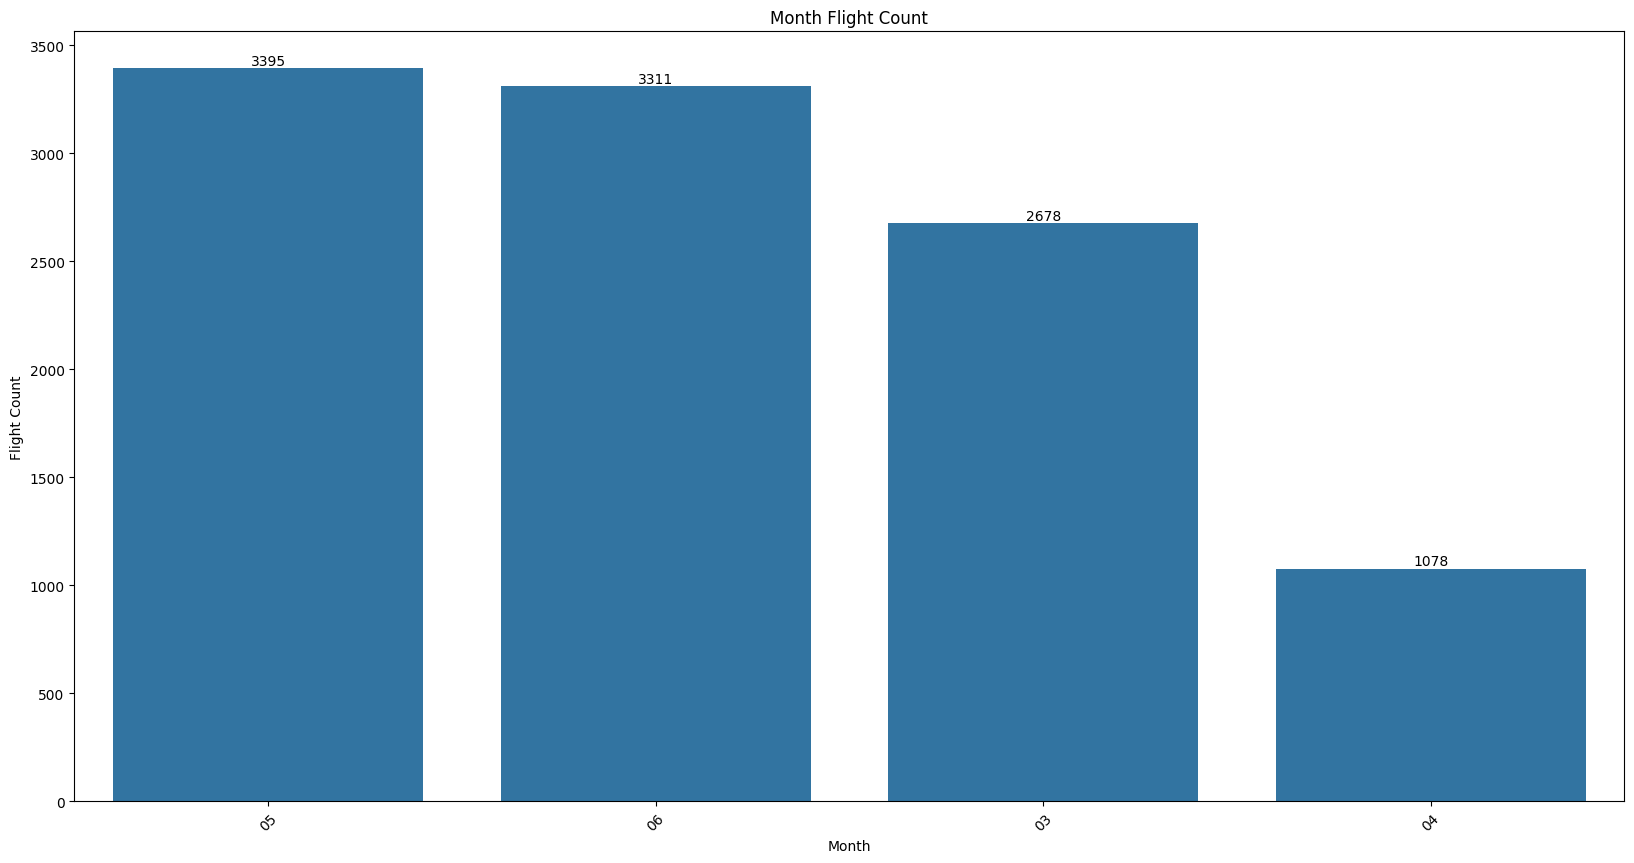

In [36]:
# Plotting count Plot for Month flights
plt.figure(figsize=(20, 10))
sorted_df = df['Month'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Month', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Month Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()

In [37]:
df['Year'].value_counts()

,count
Year,
2019,10462


In [38]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

<ipython-input-38-e41e4c693373>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time']=pd.to_datetime(df['Dep_Time'])


In [39]:
df['Dep_Time']

,Dep_Time
0,2024-09-17 22:20:00
1,2024-09-17 05:50:00
2,2024-09-17 09:25:00
3,2024-09-17 18:05:00
4,2024-09-17 16:50:00
...,...
10678,2024-09-17 19:55:00
10679,2024-09-17 20:45:00
10680,2024-09-17 08:20:00
10681,2024-09-17 11:30:00


In [40]:
def addHour(Dep_Time):
  if Dep_Time.minute>=30:
    return Dep_Time.hour+1
  else:
    return Dep_Time.hour



In [41]:
df['Dep_Hour']=df['Dep_Time'].apply(addHour)

In [42]:
df['Dep_Hour']

,Dep_Hour
0,22
1,6
2,9
3,18
4,17
...,...
10678,20
10679,21
10680,8
10681,12


In [43]:
df=df.drop(['Date_of_Journey','Route','Arrival_Time','Dep_Time','Year'],axis=1)

In [44]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,03,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,05,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,06,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,05,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,01,03,17


In [45]:
df.to_csv('cleaned_df.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Duration         10462 non-null  int64 
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Day              10462 non-null  object
 8   Month            10462 non-null  object
 9   Dep_Hour         10462 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.1+ MB


# Feature&&Price

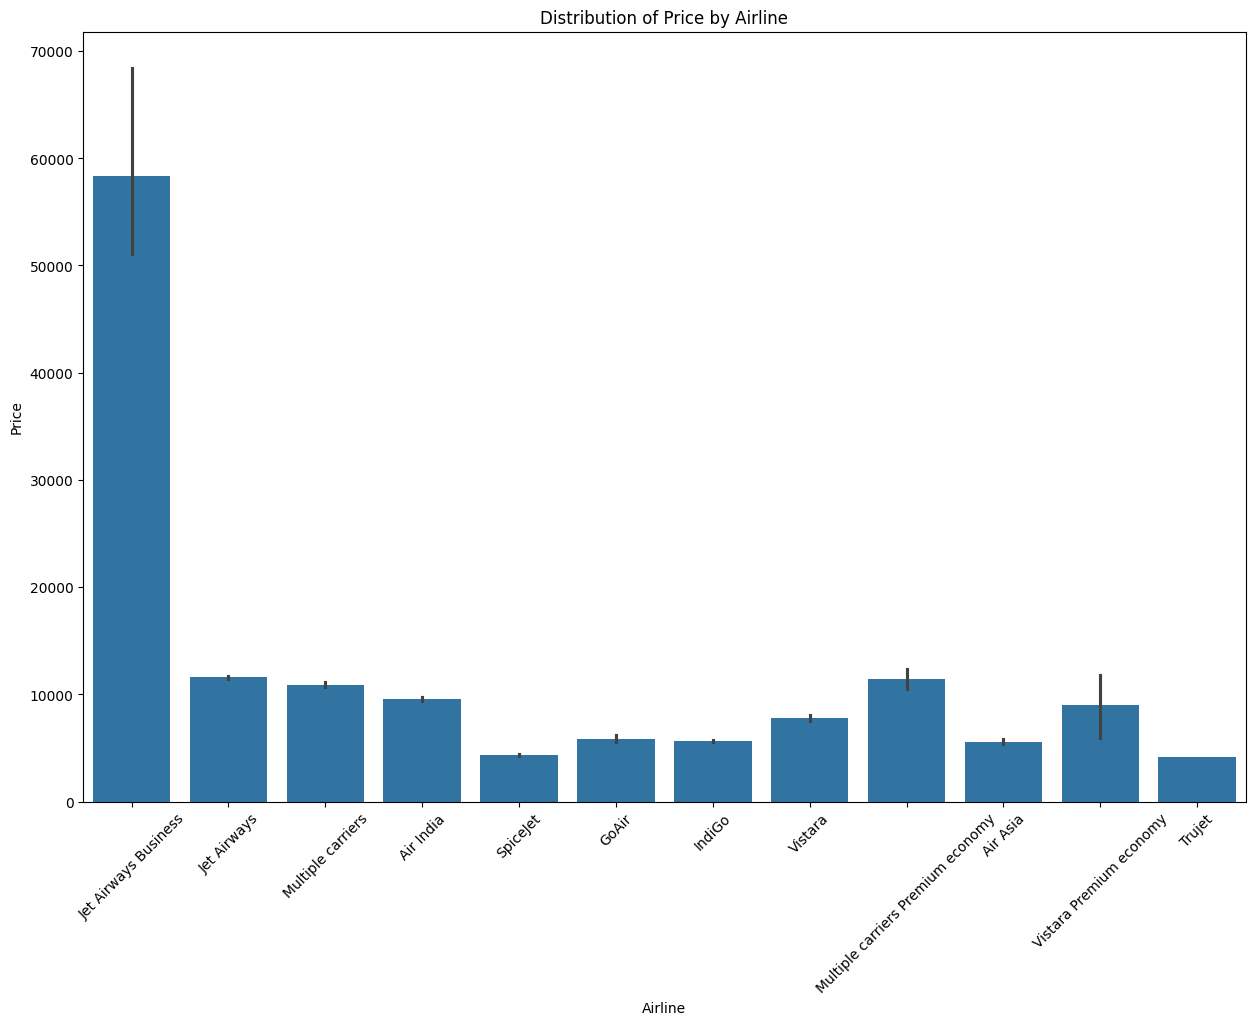

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Box Plot لتوزيع الأسعار بناءً على شركات الطيران
plt.figure(figsize=(15,10))
sns.barplot(data=df.sort_values('Price',ascending=False),x='Airline', y='Price')
plt.xticks(rotation=45)  # تدوير تسميات المحور السيني لتكون أكثر وضوحًا
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Distribution of Price by Airline')
plt.show()


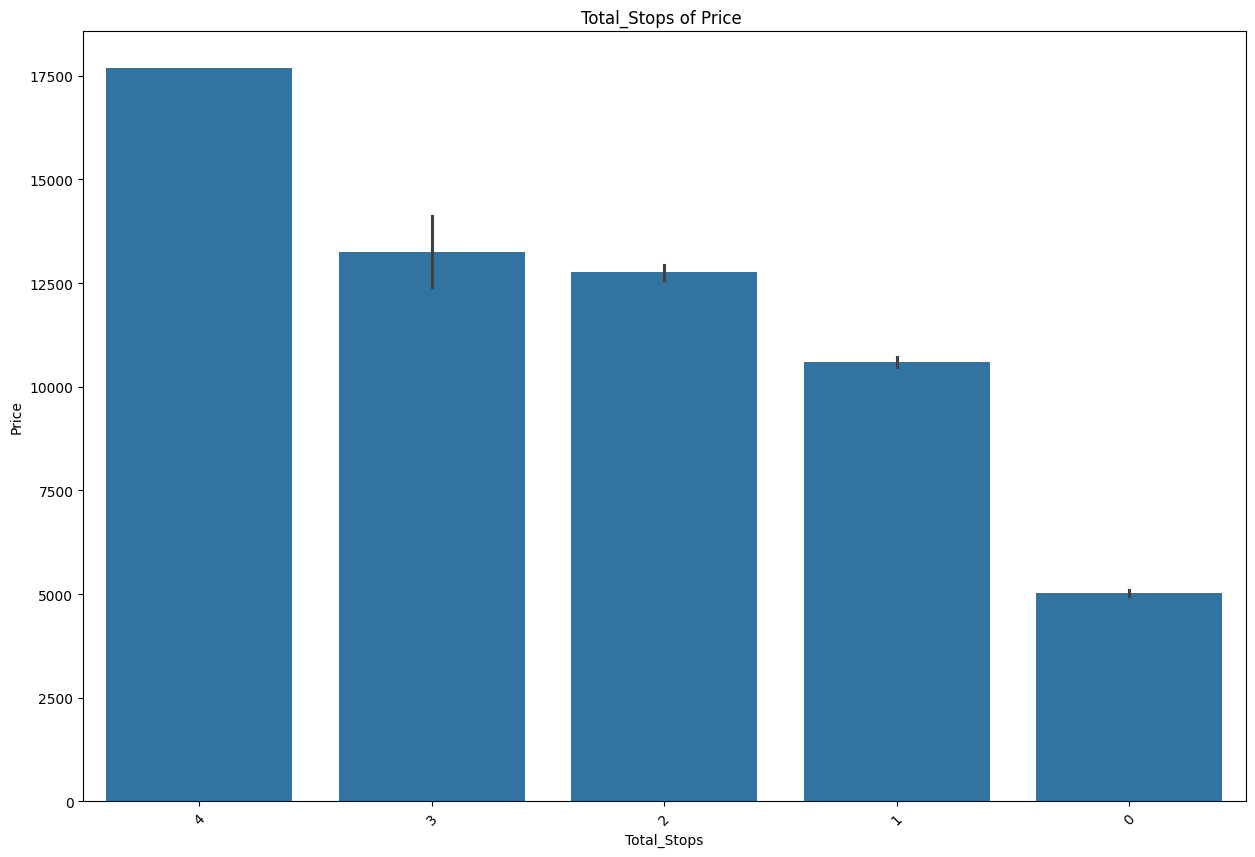

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))
sns.barplot( data=df.sort_values('Total_Stops',ascending=False),x='Total_Stops', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.title('Total_Stops of Price ')
plt.show()

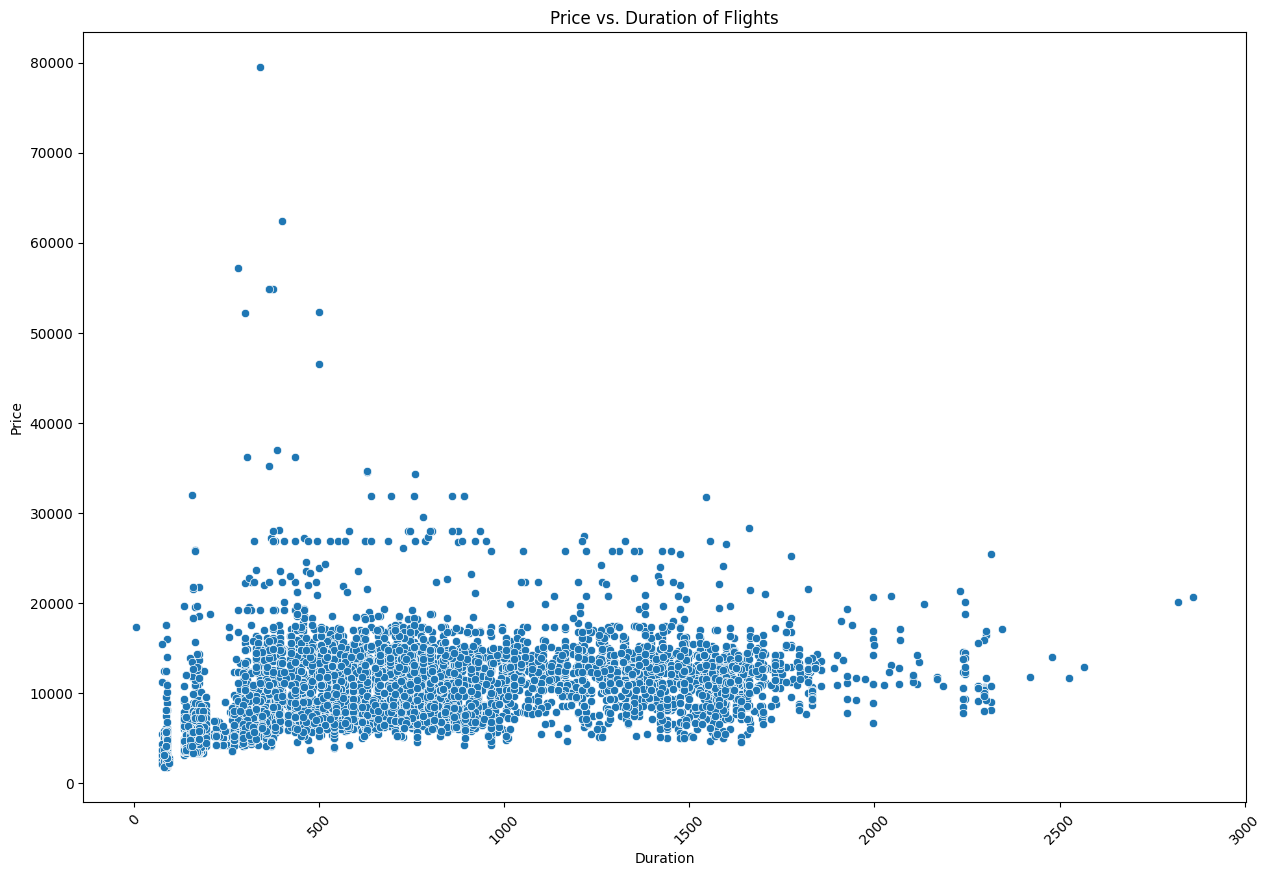

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Scatter Plot لتوزيع الأسعار بناءً على مدة الرحلة
plt.figure(figsize=(15,10))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.xticks(rotation=45)  # تدوير تسميات المحور السيني لتكون أكثر وضوحًا
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Price vs. Duration of Flights')
plt.show()


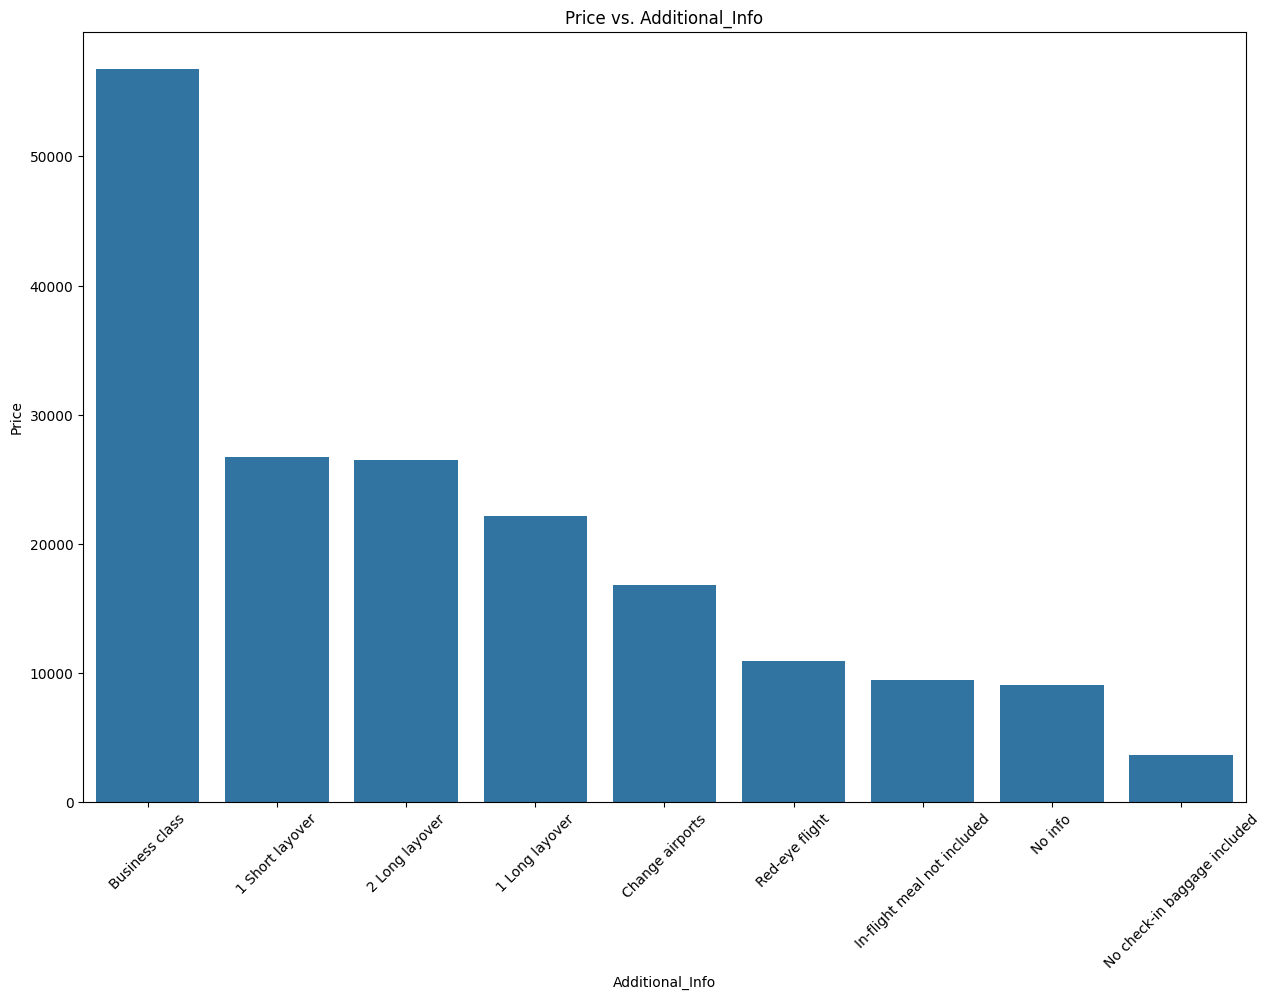

In [50]:
plt.figure(figsize=(15,10))
sorted_df=df.groupby('Additional_Info')['Price'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=sorted_df,x='Additional_Info', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Additional_Info')
plt.ylabel('Price')
plt.title('Price vs. Additional_Info')
plt.show()


In [51]:
df['Day'].value_counts()

,count
Day,
9,1275
6,1173
27,1092
21,1085
24,1022
15,967
12,946
1,907
18,814


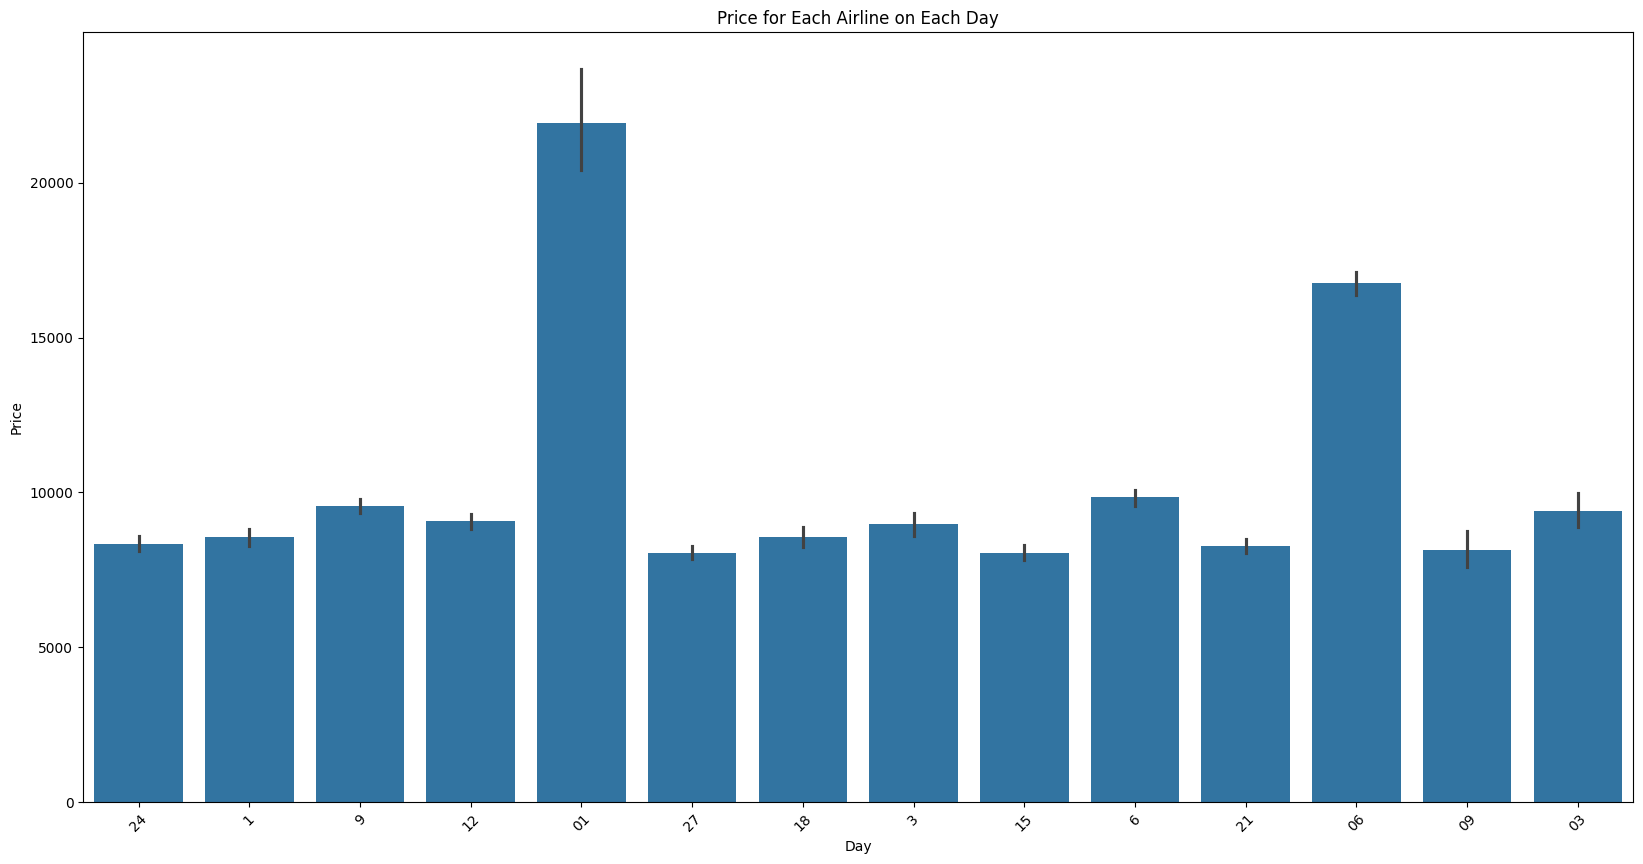

In [52]:
# Airline flights price for each Day
plt.figure(figsize=(20, 10))

# Plot individual prices with stripplot
sns.barplot(data=df, x='Day', y='Price')

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Price for Each Airline on Each Day')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Some Insight

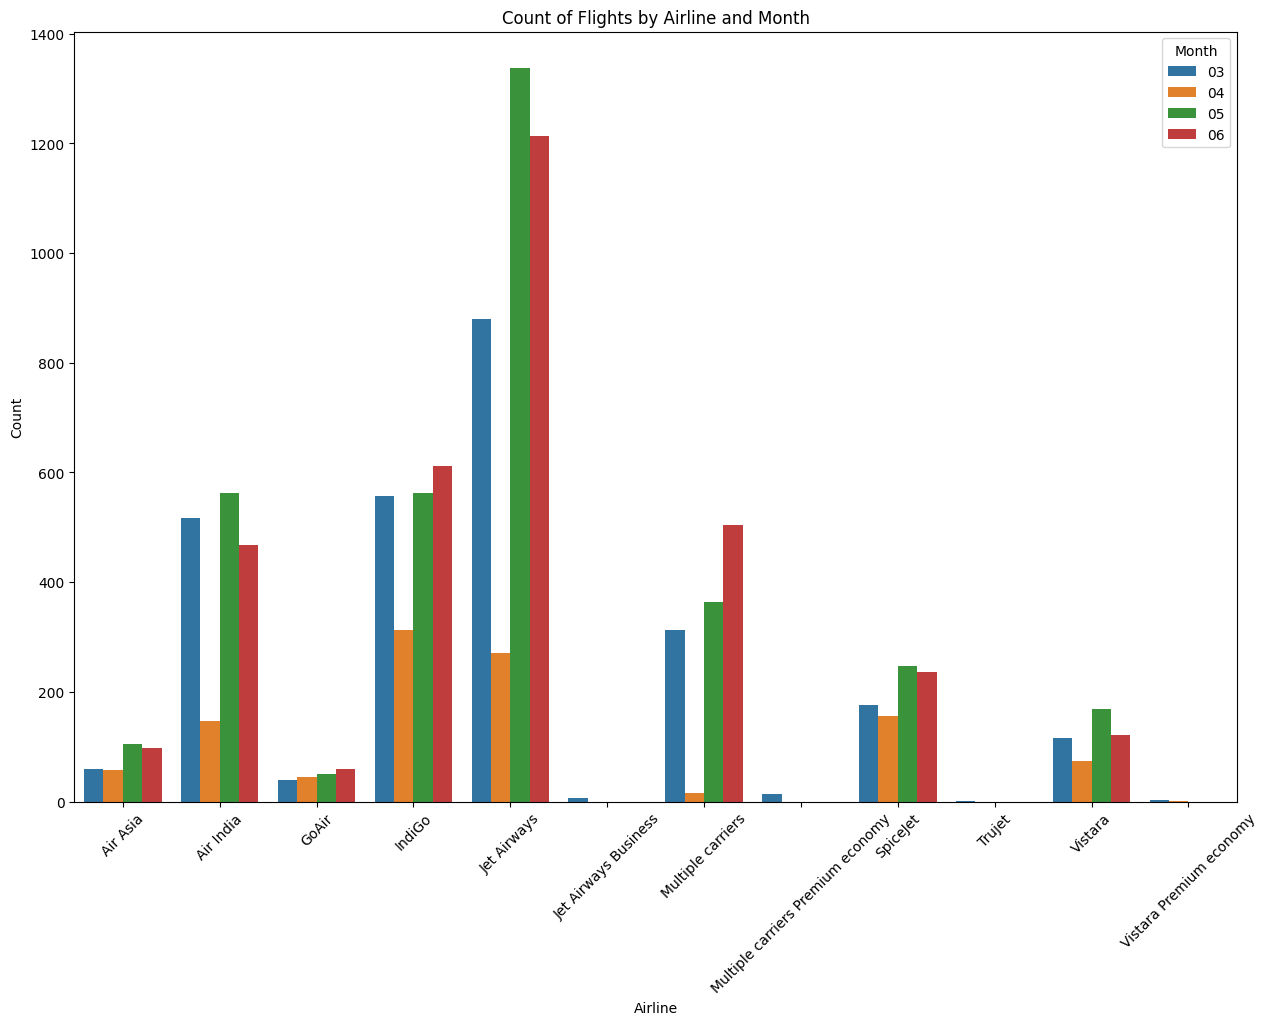

In [53]:
plt.figure(figsize=(15,10))
sorted_df=df.groupby(['Airline','Month']).size().reset_index().rename(columns={0:'count'})
sns.barplot(data=sorted_df,x='Airline',y='count',hue='Month')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Count of Flights by Airline and Month')
plt.show()


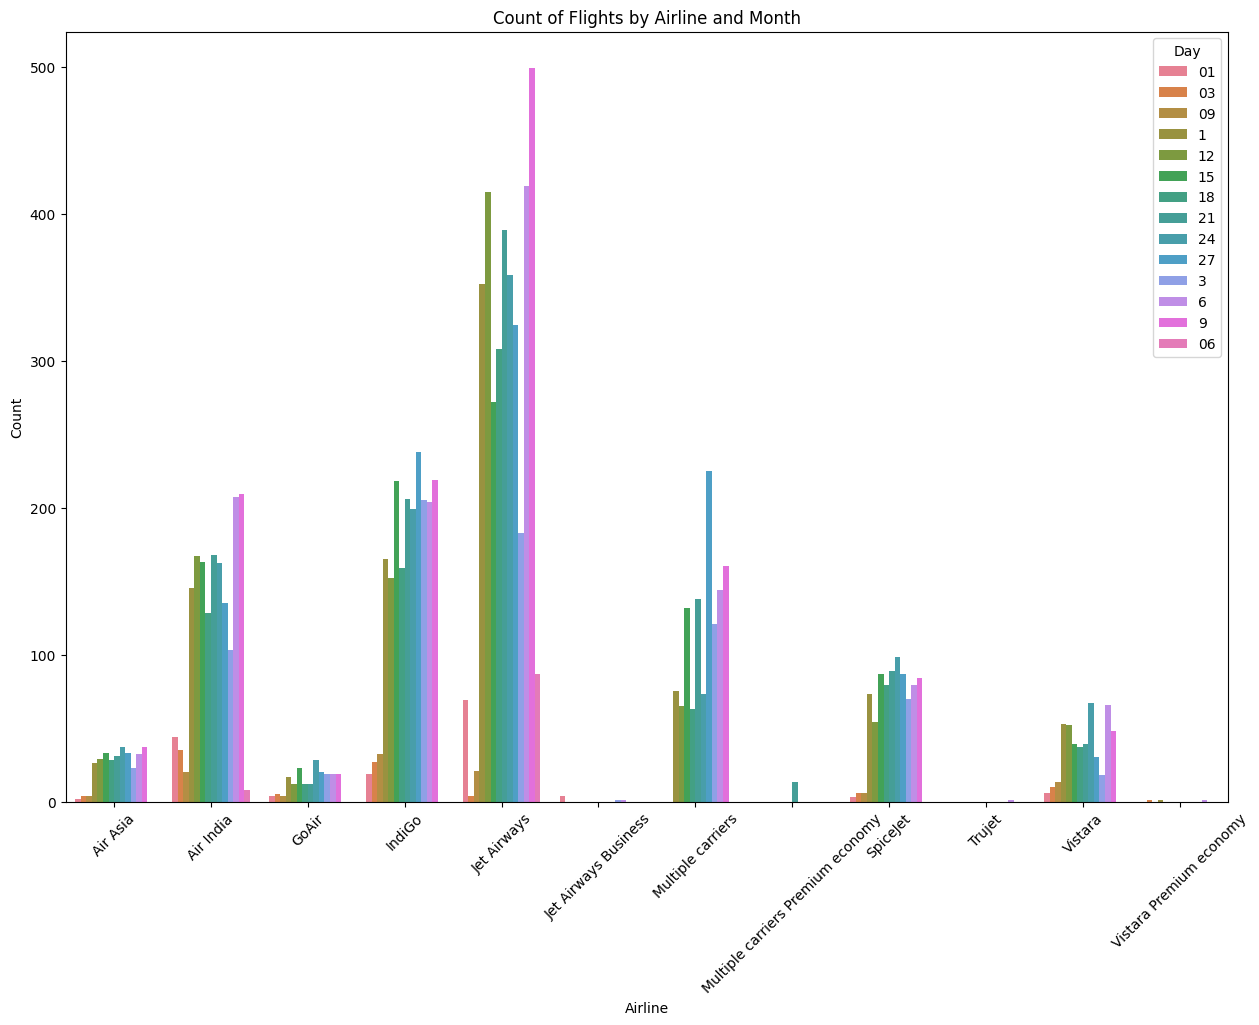

In [54]:
plt.figure(figsize=(15,10))
sorted_df=df.groupby(['Airline','Day']).size().reset_index().rename(columns={0:'count'})
sns.barplot(data=sorted_df,x='Airline',y='count',hue='Day')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Count of Flights by Airline and Month')
plt.show()

# Top 5 Days With Height Count of flight

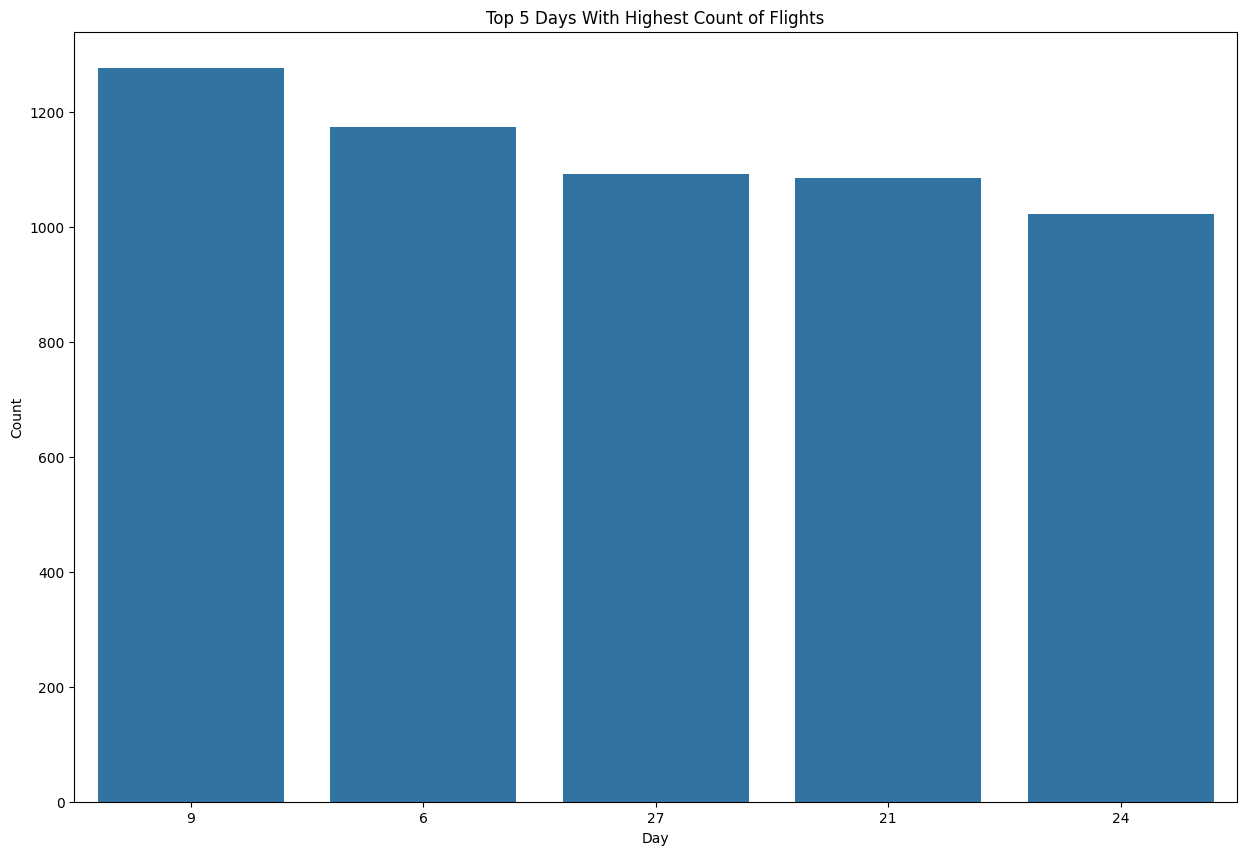

In [55]:
# Calculate top 5 days with highest count
sort_top5_day = df['Day'].value_counts().sort_values(ascending=False).head(5)
sort_top5_day = sort_top5_day.reset_index()

# Rename columns for better clarity
sort_top5_day.columns = ['Day', 'Count']

# Plot the results
plt.figure(figsize=(15, 10))
sns.barplot(data=sort_top5_day, x='Day', y='Count')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Top 5 Days With Highest Count of Flights')
plt.show()


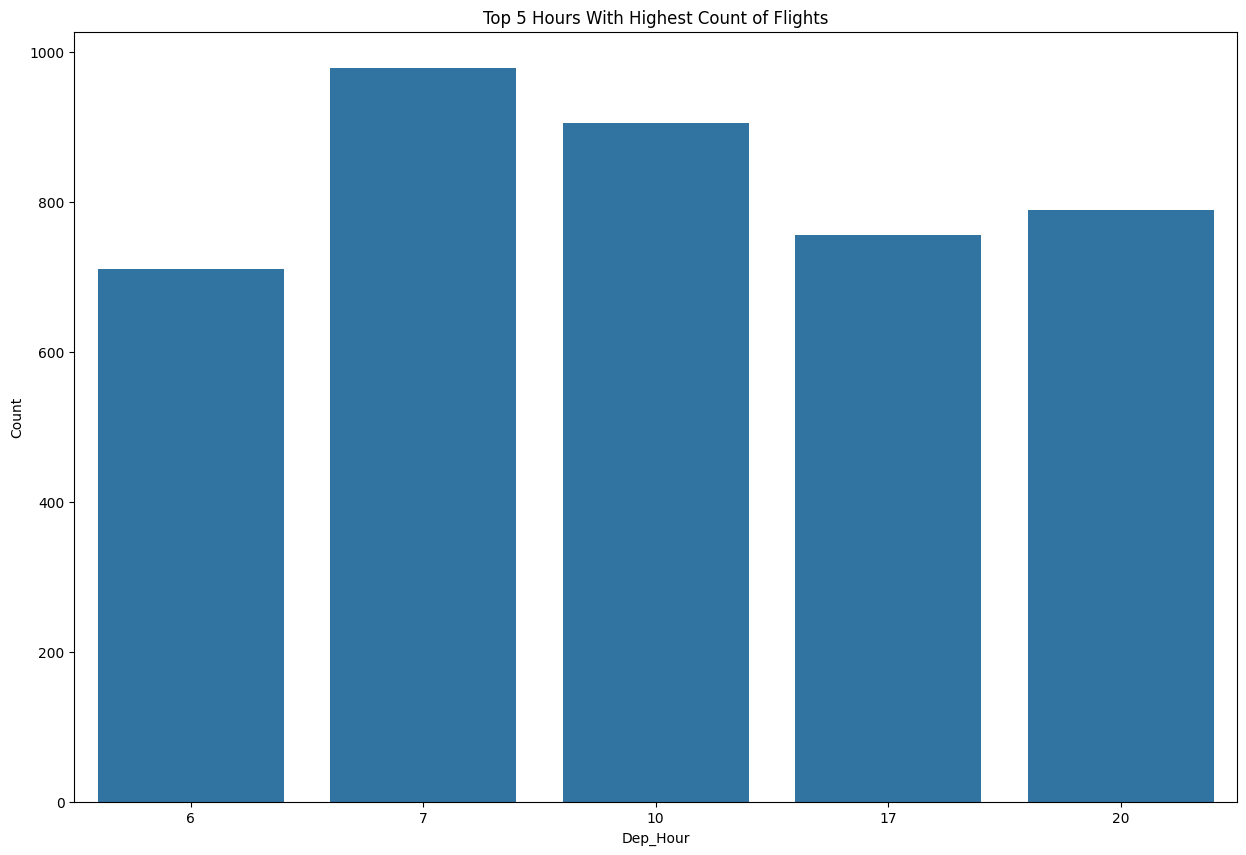

In [56]:
flight_counts=df['Dep_Hour'].value_counts().reset_index()
flight_counts.columns=['Dep_Hour','Count']
sorted_counts=flight_counts.head(5).sort_values('Dep_Hour')
plt.figure(figsize=(15,10))
sns.barplot(data=sorted_counts,x='Dep_Hour',y='Count')
plt.xlabel('Dep_Hour')
plt.ylabel('Count')
plt.title('Top 5 Hours With Highest Count of Flights')
plt.show()

In [57]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,03,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,05,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,06,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,05,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,01,03,17


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Duration         10462 non-null  int64 
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Day              10462 non-null  object
 8   Month            10462 non-null  object
 9   Dep_Hour         10462 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.1+ MB


In [59]:
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Total_Stops']=df['Total_Stops'].astype(int)

In [60]:
train_categrical=df.select_dtypes(object)
train_numerical=df.select_dtypes(np.number)

In [61]:
train_categrical

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info
10679,Air India,Kolkata,Banglore,No info
10680,Jet Airways,Banglore,Delhi,No info
10681,Vistara,Banglore,New Delhi,No info


In [62]:
train_numerical

,Duration,Total_Stops,Price,Day,Month,Dep_Hour
0,170,0,3897,24,3,22
1,445,2,7662,1,5,6
2,1140,2,13882,9,6,9
3,325,1,6218,12,5,18
4,285,1,13302,1,3,17
...,...,...,...,...,...,...
10678,150,0,4107,9,4,20
10679,155,0,4145,27,4,21
10680,180,0,7229,27,4,8
10681,160,0,12648,1,3,12


In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# Conver categroical columns to numerical

In [64]:
train_categrical=train_categrical.apply(le.fit_transform)

In [65]:
train_categrical.head()

,Airline,Source,Destination,Additional_Info
0,3,0,5,7
1,1,3,0,7
2,4,2,1,7
3,3,3,0,7
4,3,0,5,7


In [66]:
df2=pd.concat([train_numerical,train_categrical],axis=1)
df2.head()

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Airline,Source,Destination,Additional_Info
0,170,0,3897,24,3,22,3,0,5,7
1,445,2,7662,1,5,6,1,3,0,7
2,1140,2,13882,9,6,9,4,2,1,7
3,325,1,6218,12,5,18,3,3,0,7
4,285,1,13302,1,3,17,3,0,5,7


In [67]:
df2.corr()

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Airline,Source,Destination,Additional_Info
Duration,1.000000,0.727982,0.501758,-0.029810,0.004874,-0.001642,-0.153618,0.162808,-0.254243,-0.155093
Total_Stops,0.727982,1.000000,0.602013,-0.018937,0.039003,-0.064913,-0.194549,0.194203,-0.291763,-0.064786
Price,0.501758,0.602013,1.000000,-0.159044,-0.113396,0.006044,-0.036491,0.013796,-0.065875,-0.067204
Day,-0.029810,-0.018937,-0.159044,1.000000,-0.038331,-0.004166,0.026482,0.005440,-0.040994,-0.012851
Month,0.004874,0.039003,-0.113396,-0.038331,1.000000,0.036251,0.026083,0.181072,-0.362186,-0.043314
Dep_Hour,-0.001642,-0.064913,0.006044,-0.004166,0.036251,1.000000,-0.035158,0.053837,-0.063858,-0.058932
Airline,-0.153618,-0.194549,-0.036491,0.026482,0.026083,-0.035158,1.000000,-0.012172,0.015942,-0.075338
Source,0.162808,0.194203,0.013796,0.005440,0.181072,0.053837,-0.012172,1.000000,-0.589992,-0.015366
Destination,-0.254243,-0.291763,-0.065875,-0.040994,-0.362186,-0.063858,0.015942,-0.589992,1.000000,0.011240
Additional_Info,-0.155093,-0.064786,-0.067204,-0.012851,-0.043314,-0.058932,-0.075338,-0.015366,0.011240,1.000000


# Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Duration']=scaler.fit_transform(df[['Duration']])

# Perform binary encoding first, then split the data into training and test sets.

# This approach ensures consistency and avoids data leakage.

In [69]:
x=df2.drop('Price',axis=1).values
y=df2['Price']

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [71]:
print(x_train.shape)
print(x_test.shape)

(9415, 9)
(1047, 9)


## Initialize estimators

In [72]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report

In [73]:
reg1=LinearRegression()
reg2=Lasso()
reg3=Ridge()
reg4=RandomForestRegressor()
reg5=GradientBoostingRegressor()
reg6=SVR()
reg7=LogisticRegression()

## Setting Up Hyperparameters:

# Each model has different hyperparameters, which are stored in separate dictionaries. These hyperparameters define the model's behavior and are used for tuning during the cross-validation.

In [74]:
# Initialize the hyperparameters
# Linear Regression
# إعداد معلمات لنماذج مختلفة في GridSearchCV

# ElasticNet or any first regressor (param1)
param1 = {}
param1['regressor'] = [reg1]  # لم يتم تحديد أي معلمات خاصة في هذا النموذج

# Lasso Regression (param2)
param2 = {}
param2['regressor'] = [reg2]
param2['regressor__alpha'] = [0.1, 0.01, 0.001]  # قيم مختلفة لـ alpha في Lasso

# Ridge Regression (param3)
param3 = {}
param3['regressor'] = [reg3]
param3['regressor__alpha'] = [0.01, 0.001, 0.0001]  # قيم مختلفة لـ alpha في Ridge

# RandomForestRegressor (param4)
param4 = {}
param4['regressor'] = [reg4]
param4['regressor__n_estimators'] = [10, 100, 1000]  # عدد الأشجار
param4['regressor__max_depth'] = [3, 5]  # أقصى عمق لكل شجرة

# GradientBoostingRegressor (param5)
param5 = {}
param5['regressor'] = [reg5]  # كان reg4 مكررًا، يجب أن يكون reg5
param5['regressor__max_depth'] = [3, 5]  # أقصى عمق لكل شجرة
param5['regressor__n_estimators'] = [10, 100, 1000]  # عدد مراحل التعزيز
param5['regressor__learning_rate'] = [0.1, 0.01, 0.001]  # معدل التعلم

# Support Vector Regressor (SVR) (param6)
param6 = {}
param6['regressor'] = [reg6]
param6['regressor__C'] = [1.0, 10, 100]  # معلمة C للتحكم في العقوبة
param6['regressor__kernel'] = ['linear', 'rbf']  # أنواع النواة

# Logistic Regression (param7)
param7 = {}
param7['regressor'] = [reg7]
param7['regressor__C'] = [1.0, 10, 100]  # معلمة C في الانحدار اللوجستي


In [75]:
from sklearn.pipeline import Pipeline
pipline=Pipeline([
    ('regressor',reg1)
])
params=[param1,param2,param3,param4,param5,param6,param7]

In [76]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipline,params,cv=5).fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [77]:
grid.best_params_

{'regressor': GradientBoostingRegressor(),
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 5,
 'regressor__n_estimators': 1000}

In [78]:
grid.best_score_

0.8804193538833053

In [79]:
model=GradientBoostingRegressor(n_estimators=1000,max_depth=5,learning_rate=0.1)
model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=1000)

In [80]:
y_predict=model.predict(x_test)

In [81]:
r2_score(y_test,y_predict)

0.8807758332700147

In [82]:
import joblib
joblib.dump(model,'aviation_flight_fare_prediction_model.p')

['aviation_flight_fare_prediction_model.p']